In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('ElectionData.csv',parse_dates=['time'])
df.head(3)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19


In [5]:
df_dates=pd.DataFrame()
df_dates['Day']=df['time'].dt.day
df_dates['Month']=df['time'].dt.month_name()
df_dates['Year']=df['time'].dt.year
df_dates['Hour']=df['time'].dt.hour
df_dates['Min']=df['time'].dt.minute
df_dates['availableMandates']=df['availableMandates']
df_dates['totalMandates']=df['totalMandates']
df_dates['numParishes']=df['numParishes']
df_dates['numParishesApproved']=df['numParishesApproved']
df_dates['blankVotesPercentage']=df['blankVotesPercentage']
df_dates['nullVotesPercentage']=df['nullVotesPercentage']
df_dates['votersPercentage']=df['votersPercentage']
df_dates['subscribedVoters']=df['subscribedVoters']
df_dates['totalVoters']=df['totalVoters']
df_dates['pre.blankVotesPercentage']=df['pre.blankVotesPercentage']
df_dates['pre.nullVotesPercentage']=df['pre.nullVotesPercentage']
df_dates['pre.totalVoters']=df['pre.totalVoters']
df_dates['Mandates']=df['Mandates']
df_dates['validVotesPercentage']=df['validVotesPercentage']
df_dates['Hondt']=df['Hondt']


In [6]:
df_dates

,Day,Month,Year,Hour,Min,availableMandates,totalMandates,numParishes,numParishesApproved,blankVotesPercentage,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.totalVoters,Mandates,validVotesPercentage,Hondt
0,10,June,2019,20,10,226,0,3092,1081,2.50,2.30,51.36,752529,386497,1.94,1.91,428546,0,40.22,94
1,10,June,2019,20,10,226,0,3092,1081,2.50,2.30,51.36,752529,386497,1.94,1.91,428546,0,34.95,81
2,10,June,2019,20,10,226,0,3092,1081,2.50,2.30,51.36,752529,386497,1.94,1.91,428546,0,7.15,16
3,10,June,2019,20,10,226,0,3092,1081,2.50,2.30,51.36,752529,386497,1.94,1.91,428546,0,5.14,12
4,10,June,2019,20,10,226,0,3092,1081,2.50,2.30,51.36,752529,386497,1.94,1.91,428546,0,4.83,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,10,July,2019,0,35,0,8,277,277,2.81,2.08,51.04,348061,177647,2.22,1.90,190712,0,0.20,0
21639,10,July,2019,0,35,0,8,277,277,2.81,2.08,51.04,348061,177647,2.22,1.90,190712,0,0.19,0
21640,10,July,2019,0,35,0,8,277,277,2.81,2.08,51.04,348061,177647,2.22,1.90,190712,0,0.15,0
21641,10,July,2019,0,35,0,8,277,277,2.81,2.08,51.04,348061,177647,2.22,1.90,190712,0,0.14,0


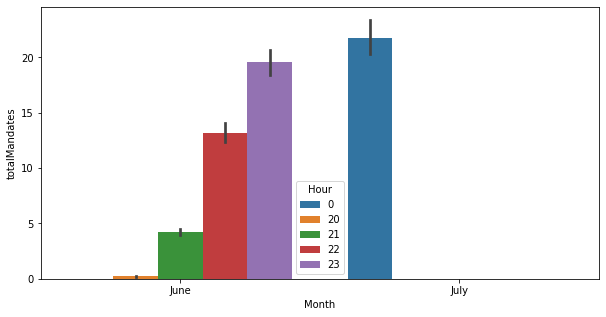

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='totalMandates',hue='Hour',data=df_dates)

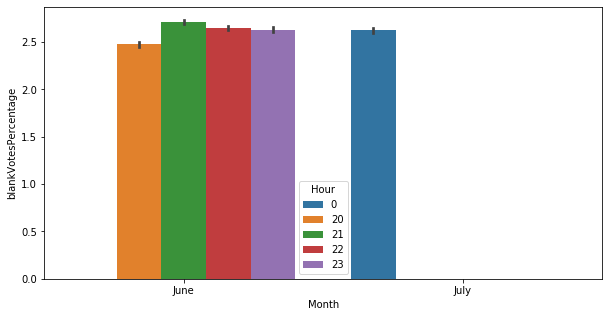

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='blankVotesPercentage',hue='Hour',data=df_dates)

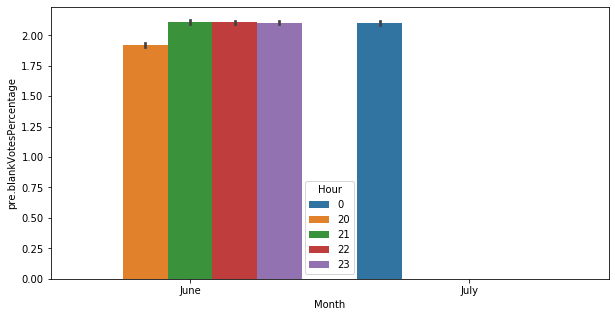

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='pre.blankVotesPercentage',hue='Hour',data=df_dates)

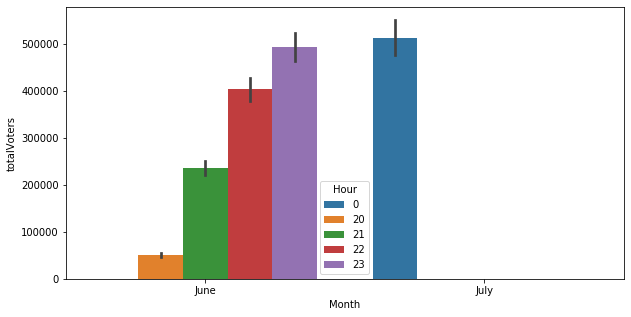

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='totalVoters',hue='Hour',data=df_dates)

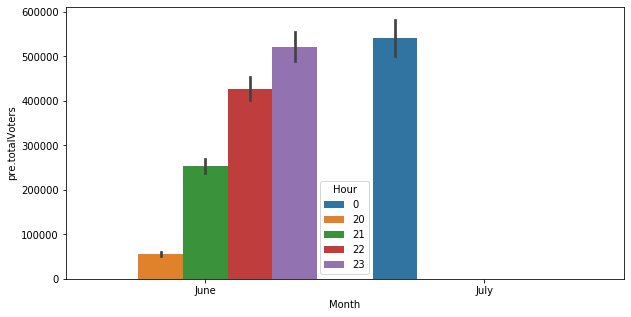

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='pre.totalVoters',hue='Hour',data=df_dates)

In [12]:
df.drop('time',axis=1,inplace=True)

In [13]:
df.shape

(21643, 27)

In [15]:
le = LabelEncoder()
list1 = ['territoryName','Party']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [17]:
collist=df.columns.values
ncol=2
nrows=14

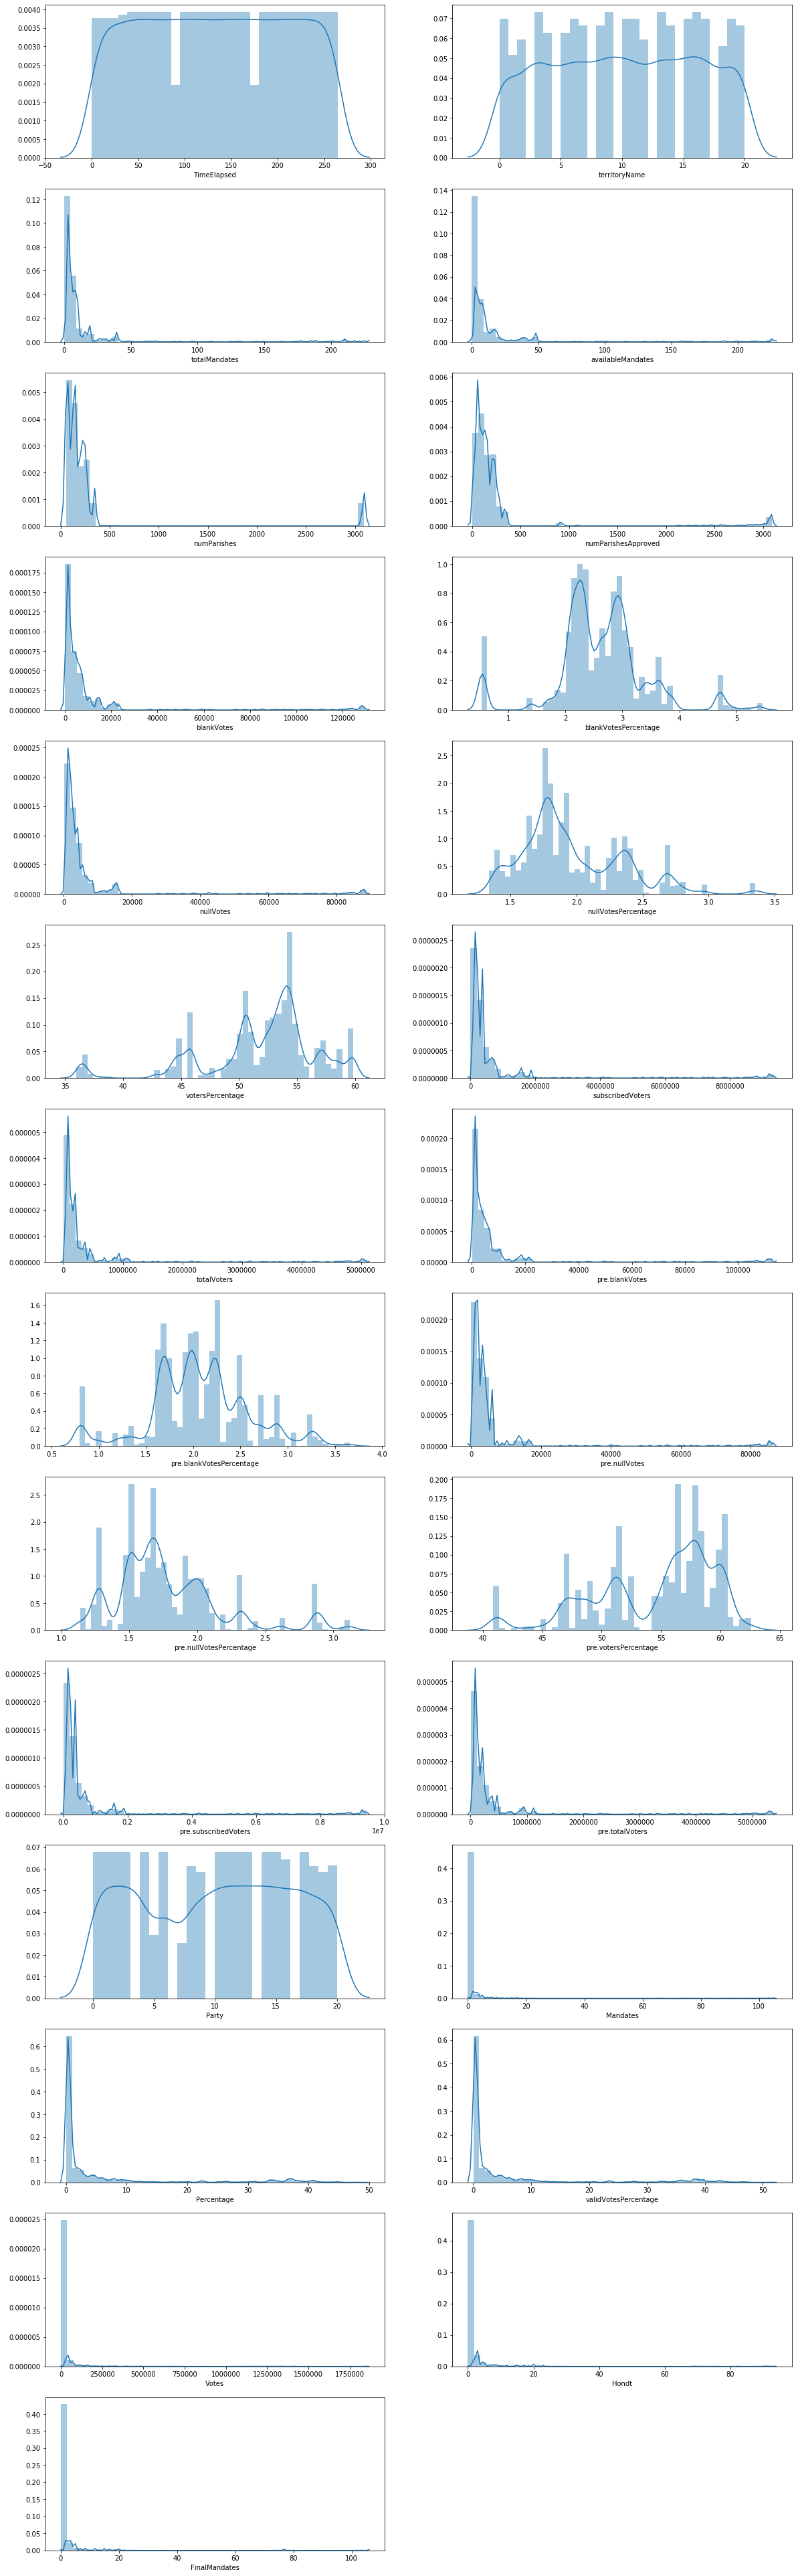

In [18]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

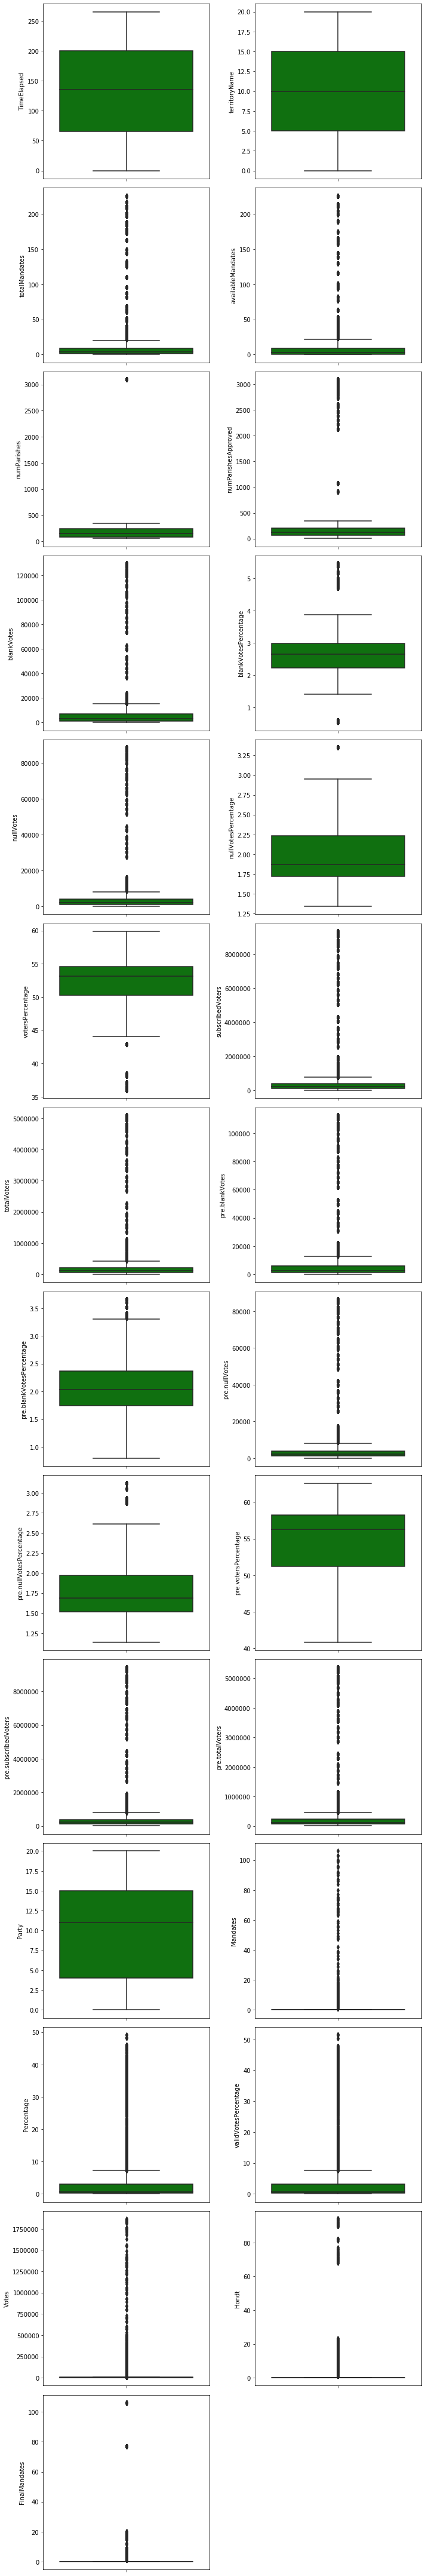

In [19]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [20]:
#Lets describe the data statistically
df.describe()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [21]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,-0.012674,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,-0.001169,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
territoryName,-0.012674,1.000000,0.172374,0.181563,0.223300,0.215599,0.178082,-0.302412,0.196554,-0.126432,0.104222,0.195483,0.193847,0.182412,-0.288817,0.200393,-0.083214,0.078855,0.196979,0.195102,0.012263,0.057823,-0.003433,-0.004874,0.078520,0.084131,0.077042
totalMandates,0.260377,0.172374,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,-0.003111,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.181563,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,-0.001882,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.223300,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,-0.004013,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.215599,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,-0.003765,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.178082,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,-0.003826,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.302412,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.019692,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.196554,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,-0.003172,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.126432,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,0.007069,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659


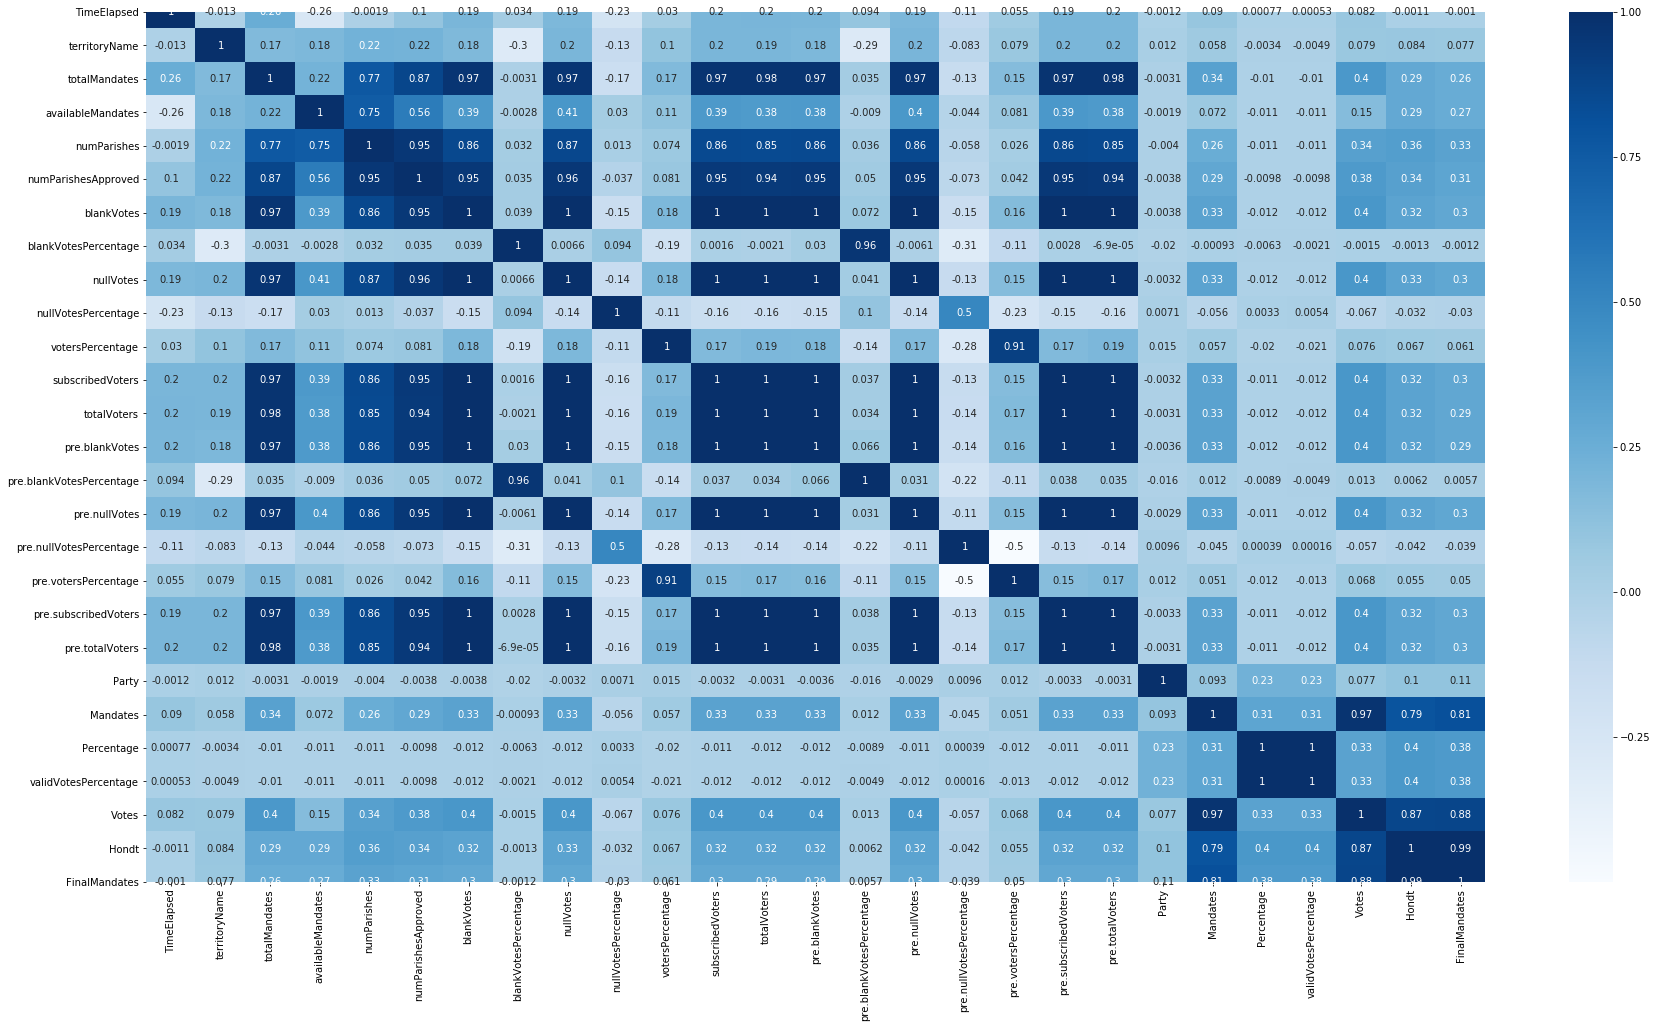

In [22]:
plt.figure(figsize = (30,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [23]:
#Now lets check the skewness
df.skew()

TimeElapsed                 -0.005496
territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandate

In [24]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [25]:
df.skew()

TimeElapsed                -0.005496
territoryName              -0.025884
totalMandates               0.673353
availableMandates           0.739482
numParishes                 1.724389
numParishesApproved         0.363008
blankVotes                 -0.132151
blankVotesPercentage        0.069627
nullVotes                  -0.033397
nullVotesPercentage         0.545046
votersPercentage           -1.158029
subscribedVoters            0.019051
totalVoters                 0.091477
pre.blankVotes             -0.043120
pre.blankVotesPercentage    0.021609
pre.nullVotes              -0.019415
pre.nullVotesPercentage     0.786357
pre.votersPercentage       -0.779289
pre.subscribedVoters        0.021921
pre.totalVoters             0.094050
Party                      -0.083536
Mandates                    4.368206
Percentage                  1.416849
validVotesPercentage        1.404150
Votes                       0.367201
Hondt                       3.093717
FinalMandates               3.196053
d

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.71470808, 0.98296816, 1.29254307, ..., 2.22252749, 6.52686767,
        6.82439402],
       [1.71470808, 0.98296816, 1.29254307, ..., 2.15919712, 6.30310377,
        6.33613766],
       [1.71470808, 0.98296816, 1.29254307, ..., 1.44267402, 3.91047362,
        4.23407055],
       ...,
       [1.69806785, 1.48421407, 0.52126036, ..., 0.64705872, 0.39763331,
        0.39292338],
       [1.69806785, 1.48421407, 0.52126036, ..., 0.67795723, 0.39763331,
        0.39292338],
       [1.69806785, 1.48421407, 0.52126036, ..., 0.99468257, 0.39763331,
        0.39292338]])

In [27]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 21567, 21623, 21624], dtype=int64), array([ 4, 25, 26, ..., 26, 21, 21], dtype=int64))


In [28]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new.head(5)

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,53.3,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,54.56,9.434443,8.828641,15,0.0,3.657131,3.702042,7.785721,2.079442,1.945910
22,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,53.3,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,54.56,9.434443,8.828641,17,0.0,3.564732,3.609566,7.690743,2.079442,2.079442
23,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,53.3,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,54.56,9.434443,8.828641,1,0.0,2.136531,2.177022,6.167516,0.693147,1.098612
24,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,53.3,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,54.56,9.434443,8.828641,2,0.0,1.965713,2.005526,5.971262,0.693147,0.693147
25,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,53.3,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,54.56,9.434443,8.828641,11,0.0,1.220830,1.252763,5.030438,0.000000,0.000000


In [29]:
x=df_new.iloc[:,0:-1]

In [30]:
y=df_new[['FinalMandates']]

In [31]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 73 is 0.9828415446020673


In [34]:

from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.9801073849914335

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 95,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [36]:
lreg.score(x_train,y_train)

0.9766740691667158

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [38]:
model = [LinearRegression(),RandomForestRegressor(n_estimators = 200, random_state = 45),GradientBoostingRegressor(),AdaBoostRegressor()]

In [39]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.9766740691667158
score 0.9998346200669822
score 0.994160251663688
score 0.9701087715661045


In [40]:
cros_val= [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for cv in cros_val:
    score= cross_val_score(cv,x,y,cv=5,scoring='r2')
    print(score.mean())

0.9781029571270257
0.9778997720601457
0.9816270895835476
0.9645984463484926


In [44]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9998346200669822

In [45]:
from sklearn.externals import joblib
joblib.dump(rf,'rfelection.obj')
rf_from_joblib = joblib.load('rfelection.obj')
rf_from_joblib.predict(x_test)

array([0.        , 1.38629436, 0.        , ..., 0.        , 0.        ,
       0.        ])